# Diabetes prediction

## Kaggle compettion
### worked on it on 18th Sept 2020

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= pd.read_csv("datasets_228_482_diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df_depen=df.iloc[:,-1]
df_indepen=df.iloc[:,:-1]

In [11]:
df_depen.shape

(768,)

In [12]:
df_indepen.shape

(768, 8)

In [13]:
df.shape

(768, 9)

In [30]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
scaler.fit(df_indepen)
df_indepen=scaler.transform(df_indepen)

In [35]:
df_indepen

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_indepen,df_depen ,test_size=0.25, random_state=44)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [66]:
lr.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred=lr.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cf=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)

In [69]:
cf

array([[110,   5],
       [ 33,  44]], dtype=int64)

In [70]:
acc

0.8020833333333334

In [71]:
from sklearn.neighbors import KNeighborsClassifier
fnn=KNeighborsClassifier(n_neighbors=1)

In [72]:
fnn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
y_pred_knn=fnn.predict(X_test)

In [74]:
print(accuracy_score(y_test,y_pred_knn))

0.71875


In [75]:
error_rate=[]

for i in range(1,50):
    fnn=KNeighborsClassifier(n_neighbors=i)
    fnn.fit(X_train,y_train)
    y_pred_knn_i=fnn.predict(X_test)
    error_rate.append(np.mean(y_pred_knn_i!=y_test))
    


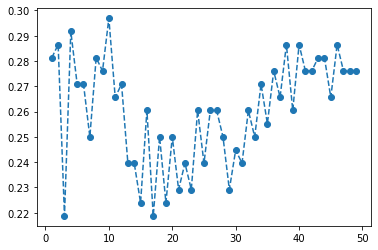

In [76]:
plt.plot(range(1,50), error_rate, marker='o',linestyle='dashed')

In [77]:
from sklearn.neighbors import KNeighborsClassifier
fnn=KNeighborsClassifier(n_neighbors=15)
fnn.fit(X_train,y_train)
y_pred_knn=fnn.predict(X_test)

In [78]:
print(accuracy_score(y_test,y_pred_knn))

0.7760416666666666


In [79]:
print(confusion_matrix(y_test,y_pred_knn))

[[108   7]
 [ 36  41]]


In [80]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       115
           1       0.85      0.53      0.66        77

    accuracy                           0.78       192
   macro avg       0.80      0.74      0.74       192
weighted avg       0.79      0.78      0.76       192



In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(fnn, X_test, y_test, cv=10)

In [84]:
score.mean()

0.7547368421052632

In [85]:
# import lr to pickle as accuracy is 80%

import pickle
# save the model to disk
filename = 'diabetes_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [103]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([df_indepen[3,:]])
print(result)

[0]


In [88]:
df_indepen[1,:]

array([-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
       -0.68442195, -0.36506078, -0.19067191])

In [104]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators=20)
classifier1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [105]:
y_pred=classifier1.predict(X_test)

In [106]:
print(accuracy_score(y_pred,y_test))

0.734375
